# Inverse Problems

So far, we have been using linear and logistic regression to predict or explain one outcome variable from a collection of input variables. This could be thought of as "Forward Modeling" or "A Forward Problem"; determining some state of a system from other "known" parameters that describe it. But what if we only had the results of some observational data? Could we somehow estimate the "unknown" parameters of a model? The answer is yes! This is exactly the process of an Inverse Problem; estimating a model's parameters given some observational data.

Inverse problems are common in many fields such as medical imaging, oceanography, seismology, and even here in education. As part of psychometric theory or test theory, Item Response Theory (IRT) is the most common application of an inverse problem in the field of education. Specially, IRT is used in computerized adaptive testing to estimate an examinee's proficency.

After completing this tutorial you should be able to:
- conceptually understand Maximum Likelihood Estimation (MLE) by estimating the average and standard deviation of a sample from a normal distribution <br/>
- use `catsim` to understand and visualize the various parameters in a 1PL, 2PL and 3PL IRT model <br/>
- use `catsim` to conceptualize the iterative process of Computerize Adaptive Testing (CAT) <br/>


## Further reading
 1. This is a really great resource! Fundamentals of Machine Learning (Part 2): Maximum Likelihood Estimation by William Fleshman can be found [here](https://towardsdatascience.com/maximum-likelihood-estimation-984af2dcfcac).
 2. Other readings that the MSU Machine Learning Group has used can be found [here](https://drive.google.com/drive/u/0/folders/1F2hcSpIa_jWyVCVS51oEO1dXzWP_kOu2).

### Task 1: Understanding Maximum Likelihood Estimation (MLE)

In order to conceptually understand an inverse problem in general, you must understand the basics of Maximum Likelikhood Esitmation (MLE). Let's consider the Probability Density Function (PDF) of a normal distribution with mean, $\mu$ and standard deviation, $\sigma$:
$$P(x;\mu,\sigma)=\frac{1}{\sqrt{(2\pi\sigma^2)}}e^\frac{-(x-\mu)^2}{2\sigma^2}$$

This tells us how likely our sample $x$ came from a distribution with true parameters $\mu$ and $\sigma$. If we were given a random sample from a normal distribution, rather than calculating the mean and standard deviation of our sample, let's explore how we could estimate $\mu$ and $\sigma$ for a given population from which our sample comes from.

1. What is the probability that an observation of 8 comes from a normal distribution with $\mu=9$ and $\sigma=1$? What if it came from a normal distribution with $\mu=11$ and $\sigma=2$? (*Hint: You will need to import `scipy.stats` to answer this question.*)
2. Now assume that we have many observations: `x = [2,4,5,8,8,9,10,12,12,18,22,26]`. Which normal distribution from (1) is this sample most likely to come from? Plot this sample along with the two normal distributions described in (1).

The overall goal of MLE is to *maximize* the likelihood function. To make this easy, statisticians take the log of of the PDF; this is called the log likelihood function.

3. Take the log of the above PDF and compare the log likelihoods of `x` coming from each of the two PDFs described in (1)  (*Hint: You should use the `numpy.log` function to take the log of the PDF for all values in x, use `+=`.)
4. Use the following function below to plot the log likelihoods for multiple standard deviations. You will need to intialize `mu_set` and `sd_set`. For which standard deviation is the likelihood function maximum? Calculate the mean and standard deviation for the sample `x`. Was the estimated $\mu$ and $\sigma$ close to the calculated mean and standard deviation?
```python
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-300, -100)
    plt.xlim(0, 20)
    
    mu_set = np.linspace()
    sd_set = []
    max_val = max_val_location = None
    
    for i in sd_set:
        ll_array = []
        for j in mu_set:
            temp_mm = 0
            for k in x:
                temp_mm += np.log(stats.norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm)
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %4.1f" % i)   
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')
```

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
print(stats.norm.pdf(8,9,1))
print(stats.norm.pdf(8,11,2))

0.24197072451914337
0.06475879783294587


(-1, 1)

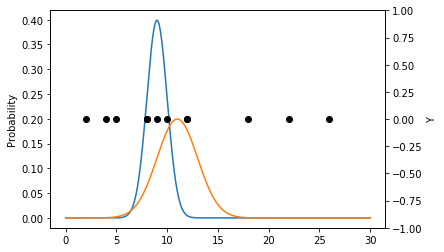

In [5]:
x_axis = np.arange(0, 30, 0.001)
data1 = stats.norm.pdf(x_axis,9,1)
data2 = stats.norm.pdf(x_axis,11,2)
x = [2,4,5,8,8,9,10,12,12,18,22,26]
y = [0,0,0,0,0,0,0,0,0,0,0,0]

fig, ax1 = plt.subplots(1, 1, sharex='col')
ax1.plot(x_axis, data1)
ax1.plot(x_axis, data2)
ax1.set_ylabel('Probability')

ax2 = ax1.twinx()
ax2.scatter(x, y, color='black')
ax2.set_ylabel('Y')
ax2.set_ylim([-1, 1])

In [6]:
def compare_LL(x, mu_1=9, mu_2=11, sd_1=1, sd_2=2):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(stats.norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(stats.norm.pdf(i, mu_2, sd_2))
    
    print (ll_1)
    print (ll_2)
    
compare_LL(x)

-336.02726239845606
-92.59502856517541


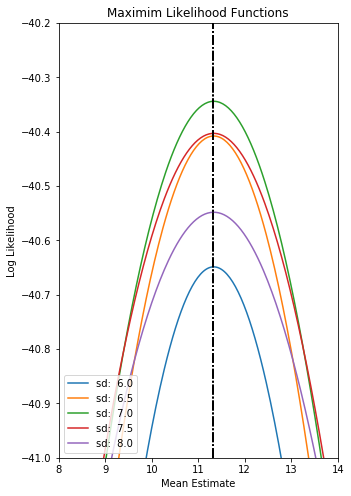

In [7]:
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-41, -40.2)
    plt.xlim(8, 14)
    
    mu_set = np.linspace(0, 30, 1000)
    sd_set = [6.0, 6.5, 7.0, 7.5, 8.0]
    max_val = max_val_location = None
    
    for i in sd_set:
        ll_array = []
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(stats.norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm)
        
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %4.1f" % i)   
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')

plot_ll(x);

In [8]:
print(np.mean(x))
print(np.std(x))

11.333333333333334
6.980130530457308


## Item Response Theory (IRT)

Item Response Theory (IRT) is a family of models that show the relationship between the ability or trait measured by an instrument or test and the probability of a correct response. This is considered an inverse problem because the observations that are collected are correct/incorrect answers to a test. From this, we can estimate the an item's difficulty, discimination, guessing parameter, and easiness. Below is the general form of these models:

$$P(X_i=1|\theta)=c_i+\frac{d_i-c_i}{1+e^{a_{i}(\theta-b_i)}}$$

where $b_i$ is the item difficulty of item $i$, $a_i$ is the item discimination of item $i$, $c_i$ is the guessing parameter of item $i$, and $d_i$ is the upper asymptote for item $i$. This function is dervied from taking the inverse of a log odds transformed logistic regression function; the derivation can actually be worked out really easily by hand. 

This general model, or 4PL model, can be constrained depending on what you are interested in. When $d=1$, this is considered a 3PL model. When $d=1$ and $c=0$, this is considered a 2PL model. And when $d=1$, $c=0$, and $a=1$, this is considered a 1PL model. For our purposes we will explore the 2PL model below.

### Task 2: A Basic Understanding of IRT using `catsim` given a known item bank

Unfornuately, Python does not currently have a package that will estimate the IRT model parameters from only student response pattern data (the main goal of an inverse problem); most of this type of work is done in R and R-Studio. Python does however have a computerized adaptive testing simulator that assumes that an item bank is already known and therefore item parameters are already estimated. We will play around with CAT for the second half of this tutorial.

1. First, you will need to install catsim on vegeta: `pip3 install --user catsim`. Then, import the following from `catsim` in your Jupyter notebook:
```python
from catsim.cat import generate_item_bank
from mpl_toolkits.mplot3d import Axes3D
from catsim.plot import item_curve
```
3. Generate a 5 question item bank using the `generate_item_bank` function for a 2PL IRT model. Plot the items in a 3D plot.
4. Using `item_curve`, plot the item characteristic curve (ICC) and the item information curve (IIC) for each of the five items separately. <br/>
    a. What is each item's difficulty? What do you notice about the y-axis for each of the item's difficulties? From this observation, come up with a definition for item difficulty. <br/>
    b. What is each item's discrimination? What do you notice about the slope at $P(\theta)=0.5$? From this observation, come up with a definition for the item discrimination. <br/>
    c. What does the item information curve tell us? Hypothesize how you would be able to plot the test information curve?

In [9]:
from catsim.cat import generate_item_bank
from mpl_toolkits.mplot3d import Axes3D
from catsim.plot import item_curve

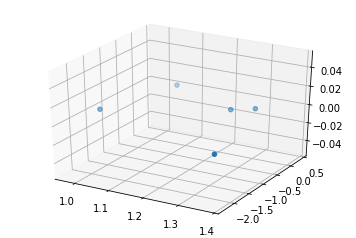

In [10]:
items = generate_item_bank(5, "2PL")
x = items[:,0]
y = items[:,1]
z = items[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()

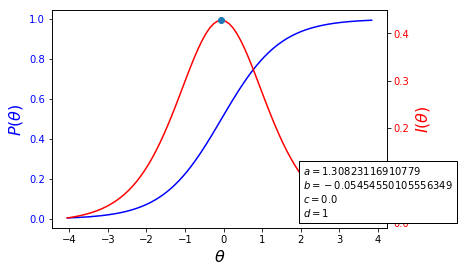

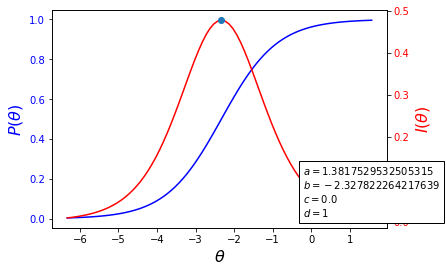

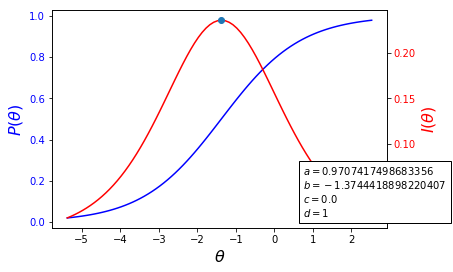

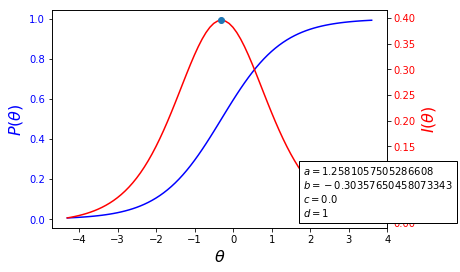

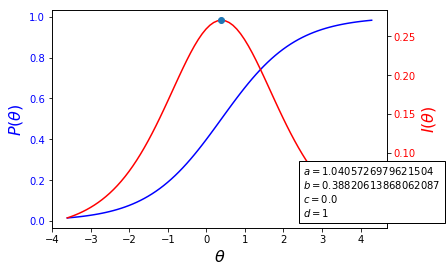

In [11]:
for i in range(5):

    item_curve(items[i,0], items[i,1], items[i,2], ptype='both')

## Computerized Adaptive Testing (CAT)

Computerized adaptive testing (CAT) is used with many standardized assessments such as the SAT and the ACT. 

### Task 3: Using `catsim` to estimate a student's overall proficency on a CAT

1. Import the following functions from the `catsim` package:
```python
from catsim.initialization import RandomInitializer
from catsim.estimation import HillClimbingEstimator
from catsim.selection import MaxInfoSelector
from catsim.stopping import MaxItemStopper
```
2. First, we will need to define an item bank, a student response vector, and the items that the student has already taken. <br/>
    a. Generate a 1000 question item bank using `generate_item_bank` from above. 
    b. A student answered items 745, 23, 137, and 889 correct and answer items 542, 365, 901, and 17 incorrect. Construct a `stud_resp` Boolean vector and a `items_taken` numeric vector.
3. In order to estimate the student's proficency, we must intialize a random proficency for that said student. Using `RandomInitializer`, print an initial proficency for the student.
4. Using `Hill ClimbingEstimator` from `catsim.estimation`, estimate a new proficency given the defined student's response pattern and the items that he student has taken.
5. Based upon the student's new profiency, what item from the item bank should be administered? (*Hint: use `MaxInfoSelector` from `catsim.selection`*)
6. At what point should this iterative process be complete? (*Hint: explore using `MaxItemStopper` from `catsim.stopping`*)

In [12]:
from catsim.initialization import RandomInitializer
from catsim.selection import MaxInfoSelector
from catsim.estimation import HillClimbingEstimator
from catsim.stopping import MaxItemStopper

In [13]:
bank_size = 1000
items = generate_item_bank(bank_size)
stud_resp = [True, True, False, False, True, True, False, False]
items_taken = [435, 221, 17, 881, 756, 889, 34, 445]

In [14]:
initial = RandomInitializer()
init_theta = initial.initialize()
print('Examinee initial proficiency:', init_theta)

Examinee initial proficiency: 1.007475643657589


In [15]:
estimator = HillClimbingEstimator()
new_theta = estimator.estimate(items=items, administered_items=items_taken, response_vector=stud_resp, est_theta=init_theta)
print('Estimated proficiency, given answered items:', new_theta)

Estimated proficiency, given answered items: -0.8465440561527624


In [17]:
selector = MaxInfoSelector()
item_index = selector.select(items=items, administered_items=items_taken, est_theta=init_theta)
print('Next item to be administered:', item_index)

C:\Users\Rachel\Anaconda3\lib\site-packages\catsim\selection.py:86: UserWarning: This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0
  'This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0'


Next item to be administered: 897


In [20]:
stopper = MaxItemStopper(8)
done = stopper.stop(administered_items=items[items_taken], theta=init_theta)
print('Should the test be stopped:', done)

Should the test be stopped: True


## Challenges

Now that you understand the some basics about inverse problems and, more so, IRT and CAT, you should be able to explore this in more detail.

1. A class of 150 students have taken the 8 item test that you defined above. Explore `Simulator` to run a simulation and plot the item difficulty and student proficency using `test_progress`. You will need to import the following:
```python
from catsim.simulation import Simulator
from catsim.plot import test_progress
```
2. Describe the relationship between the item difficulty, the student's response to the individual item, and the student's proficency.

In [27]:
from catsim.simulation import Simulator
from catsim.plot import test_progress


Starting simulation: Random Initializer Maximum Information Selector Hill Climbing Estimator Maximum Item Number Initializer 1000 items


100%|██████████| 150/150 [00:11<00:00, 13.35it/s]


Simulation took 11.239431619644165 seconds


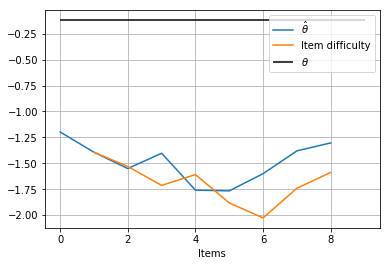

Accessing examinee 132 results...
True proficiency: -0.11935372769693202
Items administered: [464, 626, 640, 906, 787, 620, 390, 198]
Responses: [False, True, True, False, True, True, True, True]
Proficiency estimation during each step of the test: [-1.1978275016925242, -1.3935576327084112, -1.550647580159385, -1.403187789136259, -1.7591997585018444, -1.7661557828338568, -1.6002689788072408, -1.3801790888061007, -1.303030226730411]


In [26]:
sim = Simulator(items, 150)
sim.simulate(initial, selector, estimator, stopper, verbose=True)
test_progress(simulator=sim,index=132)

examinee=132
print('Accessing examinee', examinee, 'results...')
print('True proficiency:', sim.examinees[examinee])
print('Items administered:', sim.administered_items[examinee])
print('Responses:', sim.response_vectors[examinee])
print('Proficiency estimation during each step of the test:', sim.estimations[examinee])